In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from datetime import datetime

In [2]:
gap_choice = 15
year = 2013

folder_path = 'Ontario_Data/Credit_River_Conservation/New_Data/Hydrometric'
folder_list = os.listdir(folder_path)
collection = {}
for file in os.listdir(folder_path):
    if(file == 'credit_glen_williams.csv'):
        continue
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path, sep=',', low_memory=False).iloc[:,:3]
    df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%m/%d/%Y %I:%M:%S %p')
    df = df.drop(columns=['Date', 'Time'], axis='columns')

    collection[file] = df.copy()
    df_non_null = df.copy()
    df_non_null = df[pd.to_numeric(df['Stage (m)'], errors='coerce').notnull()]
    df_non_null = df_non_null[df_non_null.notna().any(axis=1)]
    print(file)
    print(f'LEN: {len(df_non_null.Datetime.unique())}')

    df_gap = pd.DataFrame(columns=['Date', 'Date_Prev', 'Gap', 'Num_Gaps'])
    rows = []
    date_prev = 0
    for i, date in enumerate(df_non_null['Datetime'].unique()):
        if(i > 0):
            gap = date - date_prev
            if(gap.seconds/60 > gap_choice or gap.days > 0):
                rows.append([date, date_prev, gap, int((gap.seconds/60 + gap.days*24*60)/15)-1])
        date_prev = date
    for row in rows:
        df_gap.loc[len(df_gap)] = row
    display(df_gap[df_gap.Date.dt.year < 2024])
    print(f'Total Gaps: {df_gap[df_gap.Date.dt.year == year].Num_Gaps.sum()}\n')

churchville.csv
LEN: 346907


,Date,Date_Prev,Gap,Num_Gaps
0,2013-08-10 18:45:00,2013-08-10 17:45:00,0 days 01:00:00,3
1,2013-08-10 19:45:00,2013-08-10 19:00:00,0 days 00:45:00,2
2,2013-08-15 07:45:00,2013-08-10 20:00:00,4 days 11:45:00,430
3,2013-08-15 08:45:00,2013-08-15 08:00:00,0 days 00:45:00,2
4,2013-08-19 12:30:00,2013-08-19 11:45:00,0 days 00:45:00,2
...,...,...,...,...
82,2022-01-12 00:15:00,2022-01-10 22:00:00,1 days 02:15:00,104
83,2022-01-16 16:45:00,2022-01-14 14:45:00,2 days 02:00:00,199
84,2022-01-19 06:15:00,2022-01-18 14:15:00,0 days 16:00:00,63
85,2022-02-16 20:45:00,2022-01-20 23:45:00,26 days 21:00:00,2579


Total Gaps: 752

credit_mgcc.csv
LEN: 213611


,Date,Date_Prev,Gap,Num_Gaps
0,2014-03-23 18:15:00,2013-12-09 22:45:00,103 days 19:30:00,9965
1,2015-03-24 11:30:00,2014-12-30 20:00:00,83 days 15:30:00,8029
2,2016-02-02 20:00:00,2016-01-04 00:45:00,29 days 19:15:00,2860
3,2016-03-06 16:30:00,2016-02-11 01:15:00,24 days 15:15:00,2364
4,2016-12-30 11:15:00,2016-12-11 20:00:00,18 days 15:15:00,1788
5,2018-02-18 21:45:00,2017-12-11 23:45:00,68 days 22:00:00,6615
6,2019-03-11 22:00:00,2019-01-10 21:45:00,60 days 00:15:00,5760
7,2019-12-27 00:15:00,2019-12-18 23:45:00,8 days 00:30:00,769
8,2020-01-27 00:15:00,2020-01-17 23:45:00,9 days 00:30:00,865
9,2020-02-11 07:45:00,2020-02-07 23:45:00,3 days 08:00:00,319


Total Gaps: 0

credit_old_derry.csv
LEN: 340633


,Date,Date_Prev,Gap,Num_Gaps
0,2013-11-29 05:30:00,2013-11-29 01:45:00,0 days 03:45:00,14
1,2013-11-29 10:30:00,2013-11-29 06:00:00,0 days 04:30:00,17
2,2013-11-29 12:15:00,2013-11-29 11:45:00,0 days 00:30:00,1
3,2013-11-30 01:30:00,2013-11-29 21:30:00,0 days 04:00:00,15
4,2013-11-30 06:00:00,2013-11-30 04:30:00,0 days 01:30:00,5
...,...,...,...,...
101,2016-03-04 09:15:00,2016-03-03 22:15:00,0 days 11:00:00,43
102,2016-12-10 13:30:00,2016-12-10 05:45:00,0 days 07:45:00,30
103,2016-12-11 11:15:00,2016-12-10 15:30:00,0 days 19:45:00,78
104,2016-12-13 06:00:00,2016-12-13 04:00:00,0 days 02:00:00,7


Total Gaps: 413

huttonville.csv
LEN: 319979


,Date,Date_Prev,Gap,Num_Gaps
0,2014-04-20 00:15:00,2013-12-10 07:15:00,130 days 17:00:00,12547
1,2014-11-27 00:15:00,2014-09-15 23:45:00,72 days 00:30:00,6913
2,2014-12-16 11:45:00,2014-12-14 18:30:00,1 days 17:15:00,164
3,2015-01-10 05:30:00,2015-01-04 21:30:00,5 days 08:00:00,511
4,2016-01-23 08:45:00,2016-01-09 20:30:00,13 days 12:15:00,1296
5,2016-02-27 16:45:00,2016-02-25 18:15:00,1 days 22:30:00,185
6,2016-03-03 02:00:00,2016-03-01 03:15:00,1 days 22:45:00,186
7,2016-12-20 11:45:00,2016-12-09 04:00:00,11 days 07:45:00,1086
8,2017-01-02 14:00:00,2016-12-28 20:30:00,4 days 17:30:00,453
9,2017-01-19 10:00:00,2017-01-10 03:00:00,9 days 07:00:00,891


Total Gaps: 0

levi_cr.csv
LEN: 354356


,Date,Date_Prev,Gap,Num_Gaps
0,2014-02-26 22:15:00,2014-02-26 19:15:00,0 days 03:00:00,11
1,2014-02-27 03:00:00,2014-02-27 00:30:00,0 days 02:30:00,9
2,2014-02-27 22:00:00,2014-02-27 17:00:00,0 days 05:00:00,19
3,2014-02-28 00:45:00,2014-02-27 23:15:00,0 days 01:30:00,5
4,2014-02-28 06:00:00,2014-02-28 02:00:00,0 days 04:00:00,15
5,2014-03-17 05:15:00,2014-03-17 03:00:00,0 days 02:15:00,8
6,2014-12-31 03:45:00,2014-12-31 02:00:00,0 days 01:45:00,6
7,2014-12-31 19:45:00,2014-12-31 18:30:00,0 days 01:15:00,4
8,2015-01-05 07:00:00,2015-01-05 05:00:00,0 days 02:00:00,7
9,2015-01-08 17:00:00,2015-01-08 15:30:00,0 days 01:30:00,5


Total Gaps: 0

mullet_cr.csv
LEN: 342309


,Date,Date_Prev,Gap,Num_Gaps
0,2014-01-28 19:00:00,2014-01-07 16:45:00,21 days 02:15:00,2024
1,2014-01-28 20:00:00,2014-01-28 19:00:00,0 days 01:00:00,3
2,2014-01-28 21:00:00,2014-01-28 20:00:00,0 days 01:00:00,3
3,2014-01-28 22:00:00,2014-01-28 21:00:00,0 days 01:00:00,3
4,2014-01-28 23:00:00,2014-01-28 22:00:00,0 days 01:00:00,3
...,...,...,...,...
1569,2015-01-08 17:30:00,2015-01-05 19:45:00,2 days 21:45:00,278
1570,2015-02-24 17:00:00,2015-02-20 06:00:00,4 days 11:00:00,427
1571,2016-01-07 09:15:00,2015-12-26 15:00:00,11 days 18:15:00,1128
1572,2016-02-16 21:30:00,2016-02-13 07:15:00,3 days 14:15:00,344


Total Gaps: 0

sawmill_cr.csv
LEN: 348761


,Date,Date_Prev,Gap,Num_Gaps
0,2013-12-20 11:45:00,2013-12-04 13:30:00,15 days 22:15:00,1528
1,2015-02-24 08:45:00,2015-02-23 20:30:00,0 days 12:15:00,48
2,2019-01-03 09:00:00,2018-12-25 19:45:00,8 days 13:15:00,820
3,2019-12-02 08:15:00,2019-12-01 00:00:00,1 days 08:15:00,128
4,2020-11-24 15:00:00,2020-11-24 14:00:00,0 days 01:00:00,3
5,2022-01-05 13:45:00,2021-12-29 17:00:00,6 days 20:45:00,658
6,2022-01-16 10:45:00,2022-01-15 08:15:00,1 days 02:30:00,105
7,2022-01-24 09:00:00,2022-01-21 03:00:00,3 days 06:00:00,311
8,2022-01-25 08:45:00,2022-01-24 23:15:00,0 days 09:30:00,37
9,2022-01-30 09:15:00,2022-01-30 01:30:00,0 days 07:45:00,30


Total Gaps: 1528

silver_cr.csv
LEN: 347773


,Date,Date_Prev,Gap,Num_Gaps
0,2013-09-18 14:45:00,2013-09-18 14:15:00,0 days 00:30:00,1
1,2014-02-25 00:00:00,2013-12-18 06:30:00,68 days 17:30:00,6597
2,2014-02-25 02:00:00,2014-02-25 00:00:00,0 days 02:00:00,7
3,2014-02-25 04:00:00,2014-02-25 02:00:00,0 days 02:00:00,7
4,2014-02-25 06:00:00,2014-02-25 04:00:00,0 days 02:00:00,7
...,...,...,...,...
109,2020-10-17 19:45:00,2020-10-17 18:45:00,0 days 01:00:00,3
110,2020-11-24 14:45:00,2020-11-24 14:15:00,0 days 00:30:00,1
111,2022-08-15 03:45:00,2022-08-15 03:15:00,0 days 00:30:00,1
112,2023-01-04 13:00:00,2023-01-01 02:45:00,3 days 10:15:00,328


Total Gaps: 1

springbrook.csv
LEN: 347349


,Date,Date_Prev,Gap,Num_Gaps
0,2013-09-09 14:15:00,2013-08-29 15:30:00,10 days 22:45:00,1050
1,2013-11-29 14:15:00,2013-11-29 00:45:00,0 days 13:30:00,53
2,2013-11-30 12:45:00,2013-11-29 21:15:00,0 days 15:30:00,61
3,2013-12-08 07:30:00,2013-12-07 23:15:00,0 days 08:15:00,32
4,2013-12-22 00:15:00,2013-12-09 23:45:00,12 days 00:30:00,1153
...,...,...,...,...
158,2023-03-01 10:00:00,2023-02-21 13:30:00,7 days 20:30:00,753
159,2023-03-08 12:30:00,2023-03-05 15:45:00,2 days 20:45:00,274
160,2023-06-08 22:00:00,2023-06-08 21:00:00,0 days 01:00:00,3
161,2023-06-18 04:00:00,2023-06-18 03:30:00,0 days 00:30:00,1


Total Gaps: 2377



In [152]:
# import ipywidgets as widgets
# from IPython.display import display, clear_output

# options = collection.keys()
# checkboxes = [widgets.Checkbox(description=option, value=True) for option in options]
# output = widgets.Output()
# def on_checkbox_change(change):
#     selected_options = [checkbox.description for checkbox in checkboxes if checkbox.value]
#     # ----------------- Display Graph -----------------
#     clear_output()
#     display(checkboxes_vbox, output)
#     plt.figure(figsize=(18,6))
#     for coll in selected_options:
#         # ----- Collecting Data -----
#         df_temp = collection[coll]
#         df_temp['Stage (m)'] = pd.to_numeric(df['Stage (m)'], errors='coerce').fillna(0)
#         df_temp['Year'] = df_temp.Datetime.dt.year
#         null_values = df_temp[df_temp['Stage (m)'] == 0].groupby('Year').count()
#         if(len(null_values) == 0):
#             continue
#         ax = plt.subplot(1,1,1)
#         # ----- Graph design -----
#         alpha = 0.5
#         # Xticks and Yticks
#         for label in ax.get_xticklabels() + ax.get_yticklabels():
#             label.set_alpha(alpha)
#             label.set_size(8)
#         # Spines
#         for spine in ax.spines.values():
#             spine.set_color('gray')
#             spine.set_alpha(alpha)
#         ax.spines['top'].set_alpha(0)
#         ax.spines['right'].set_alpha(0)
#         # Labels
#         ax.set_xlabel('', alpha=alpha, fontsize=8)
#         ax.set_ylabel('', alpha=alpha, fontsize=8)
#         plt.plot(null_values['Stage (m)'], label=coll)
#     ax.legend()
#     plt.xticks(df_temp.Year.unique())
#     plt.show()

# for checkbox in checkboxes:
#     checkbox.observe(on_checkbox_change, names='value')

# checkboxes_vbox = widgets.VBox(children=checkboxes)
# display(checkboxes_vbox, output)

churchville.csv


,Stage (m),Datetime
Year,,
2013,2100,2100
2014,2795,2795
2015,3343,3343
2016,2313,2313
2017,2212,2212
2018,2,2
2022,35,35
2023,742,742


credit_mgcc.csv


,Stage (m),Datetime
Year,,
2013.0,109,109
2014.0,3588,3588
2015.0,2355,2355
2016.0,2919,2919
2017.0,1802,1802
2018.0,1990,1990
2019.0,2,2


credit_old_derry.csv


,Stage (m),Datetime
Year,,
2013,439,439
2014,3258,3258
2015,2355,2355
2016,2919,2919
2017,1802,1802
2018,1990,1990
2019,2,2
2023,777,777


huttonville.csv


,Stage (m),Datetime
Year,,
2013,109,109
2014,3588,3588
2015,2355,2355
2016,2919,2919
2017,1802,1802
2018,1990,1990
2019,2,2
2023,777,777


levi_cr.csv


,Stage (m),Datetime
Year,,
2013,109,109
2014,3588,3588
2015,2355,2355
2016,2919,2919
2017,1802,1802
2018,1990,1990
2019,2,2
2023,777,777


mullet_cr.csv


,Stage (m),Datetime
Year,,
2014,3697,3697
2015,2355,2355
2016,2919,2919
2017,1802,1802
2018,1990,1990
2019,2,2
2023,777,777


sawmill_cr.csv


,Stage (m),Datetime
Year,,
2013,24,24
2014,3673,3673
2015,2355,2355
2016,2919,2919
2017,1802,1802
2018,1990,1990
2019,2,2
2023,777,777


silver_cr.csv


,Stage (m),Datetime
Year,,
2013,455,455
2014,3242,3242
2015,2355,2355
2016,2919,2919
2017,1802,1802
2018,1990,1990
2019,2,2
2023,777,777


springbrook.csv


,Stage (m),Datetime
Year,,
2013,1628,1628
2014,2388,2388
2015,3668,3668
2016,1515,1515
2017,1942,1942
2018,1623,1623
2019,1,1
2023,777,777


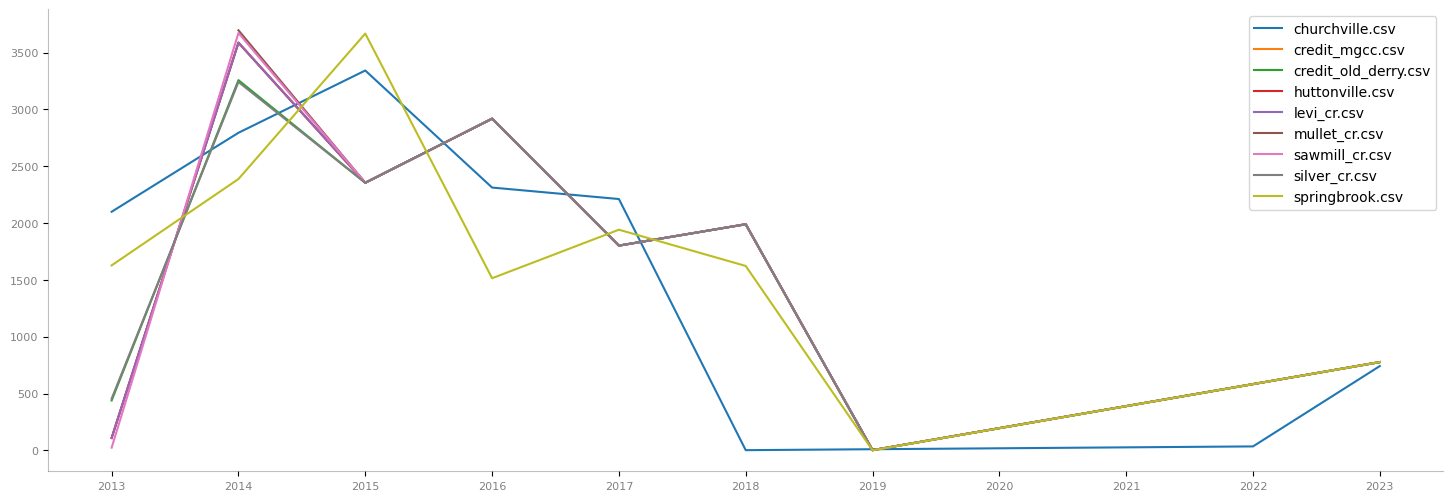

In [3]:
from IPython.display import display, clear_output

plt.figure(figsize=(18,6))
for coll in collection:
    # ----- Collecting Data -----
    df_temp = collection[coll]
    df_temp['Stage (m)'] = pd.to_numeric(df['Stage (m)'], errors='coerce').fillna(0)
    df_temp['Year'] = df_temp.Datetime.dt.year
    null_values = df_temp[df_temp['Stage (m)'] == 0].groupby('Year').count()
    print(coll)
    display(null_values)

    ax = plt.subplot(1,1,1)
    # ----- Graph design -----
    alpha = 0.5
    # Xticks and Yticks
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_alpha(alpha)
        label.set_size(8)
    # Spines
    for spine in ax.spines.values():
        spine.set_color('gray')
        spine.set_alpha(alpha)
    ax.spines['top'].set_alpha(0)
    ax.spines['right'].set_alpha(0)
    # Labels
    ax.set_xlabel('', alpha=alpha, fontsize=8)
    ax.set_ylabel('', alpha=alpha, fontsize=8)
    plt.plot(null_values['Stage (m)'], label=coll)
ax.legend()
plt.xticks(df_temp.Year.unique())
plt.show()

In [158]:
folder_path = 'Ontario_Data/Credit_River_Conservation/New_Data/Precipitation'
for file in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path, sep=',')
    
    df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%m/%d/%Y %I:%M:%S %p').copy()
    df = df[(df['Datetime'].dt.month >= 4) & (df['Datetime'].dt.month <= 11)]

    df_gap = pd.DataFrame(columns=['Date', 'Date_Prev', 'Gap', 'Num_Gaps'])
    rows = []

    for i, date in enumerate(df['Datetime'].unique()):
        if(i > 0):
            gap = date - date_prev
            if(gap.seconds/60 > 60):
                rows.append([date, date_prev, gap, int((gap.seconds/60 + gap.days*24*60)/15)+1])
        date_prev = date
    for row in rows:
        df_gap.loc[len(df_gap)] = row
    display(df_gap)
    print(f'Total Gaps: {df_gap.Num_Gaps.sum()}')    

,Date,Date_Prev,Gap,Num_Gaps


Total Gaps: 0


,Date,Date_Prev,Gap,Num_Gaps


Total Gaps: 0


,Date,Date_Prev,Gap,Num_Gaps


Total Gaps: 0
